# Explore here

In [559]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pickle




In [560]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"
file_path = '/workspaces/ML---Proyecto-Naive-Bayes/data/raw'
df = pd.read_csv(url)
# Guardar una copia local
df.to_csv('playstore_reviews.csv', index=False)


df.head()


,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


- review: El texto del comentario, que utilizaremos como variable predictora.
- polarity: La etiqueta de clase (0 = negativo, 1 = positivo).

In [561]:
# Eliminamos la variable 'package_name'
df = df.drop(columns=['package_name'])
df

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0
...,...,...
886,loved it i loooooooooooooovvved it because it...,1
887,all time legendary game the birthday party le...,1
888,ads are way to heavy listen to the bad review...,0
889,fun works perfectly well. ads aren't as annoy...,1


#### Normalizar y preparar el texto

- El atributo .str se utiliza para aplicar operaciones específicas de cadenas (strings) a cada elemento de la columna. Esto es útil cuando la columna contiene valores de texto y queremos transformar todos esos valores.
  
- str.strip(): Elimina espacios en blanco iniciales y finales en cada texto de la columna review.
  
- str.lower(): Convierte todos los caracteres en minúscu


In [562]:
# Limpiar y normalizar el texto
df["review"] = df["review"].str.strip().str.lower()
df

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0
...,...,...
886,loved it i loooooooooooooovvved it because it ...,1
887,all time legendary game the birthday party lev...,1
888,ads are way to heavy listen to the bad reviews...,0
889,fun works perfectly well. ads aren't as annoyi...,1


In [563]:
print(df.shape)

(891, 2)


In [564]:
# Explorar la distribución de la variable objetivo 'polarity'
polarity_distribution = df['polarity'].value_counts()
polarity_distribution

polarity
0    584
1    307
Name: count, dtype: int64

584 comentarios negativos y 307 comentarios positivos

#### Preparar el modelo

In [565]:
# Dividir el conjunto de datos:
X = df["review"]
y = df["polarity"]

# split - 80% entrenamiento / 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# confirmar dimensiones 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712,), (179,), (712,), (179,))

- Conjunto de entrenamiento 712 comentarios.
- Conjunto de prueba 179 comentarios

#### Vectorización - Todos los modelos de Naive Bayes necesitan pasar por un proceso de vectorización:
  
- GaussianNB: TfidfVectorizer o datos continuos.
- MultinomialNB: CountVectorizer.
- BernoulliNB: CountVectorizer seguido de binarización.

#### Entendiendo los resultados que nos van a dar los modelos

- Precisión: ¿Qué tan precisas son las predicciones?
- Recall: ¿Qué tan bien encuentra el modelo todos los casos reales?
- F1-Score: Equilibrio entre precisión y recall.
- Support: Número de ejemplos en cada clase.
- Accuracy: Porcentaje total de aciertos.
- Macro avg: Promedio simple, útil para comparar clases balanceadas.
- Weighted avg: Promedio ponderado, útil para clases desbalanceadas.

In [566]:
# Función para imprimir resultados de forma clara
def resultados_modelo(model_name, accuracy_train, accuracy_test, report):
    print(f"\n{'='*50}")
    print(f"Resultados del modelo: {model_name}")
    print(f"{'='*50}")
    print(f"Precisión en entrenamiento: {accuracy_train:.2f}")
    print(f"Precisión en prueba: {accuracy_test:.2f}")
    print("\nMétricas detalladas en el conjunto de prueba:")
    print(report)
    print(f"{'='*50}\n")

### MODELO GaussianNB
Vectorización con TfidfVectorizer para el modelo GaussianNB

In [567]:
# Transformar el texto en una matriz de recuento de palabras para el modelo gausiano
vec_model = CountVectorizer(stop_words="english")
X_train_tfidf = vec_model.fit_transform(X_train).toarray()
X_test_tfidf = vec_model.transform(X_test).toarray()

# Verificar las dimensiones de los datos vectorizados
X_train_tfidf.shape, X_test_tfidf.shape

((712, 3310), (179, 3310))

- 712 comentarios de entrenamiento se transformaron en 3272 características.
- 179 comentarios de prueba también tienen 3272 características.  
Esto significa que cada palabra o combinación relevante en los comentarios se ha convertido en una característica numérica, lo que permite a los modelos procesar los datos.

In [568]:
X_train_tfidf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [569]:
X_test_tfidf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [570]:
y.unique()

array([0, 1])

#### Entrenamiento del modelo

In [571]:
# Crear y entrenar el modelo GaussianNB
gaussian_model = GaussianNB()
gaussian_model.fit(X_train_tfidf, y_train)

# Predicciones en el conjunto de prueba
y_pred_test = gaussian_model.predict(X_test_tfidf)
y_pred_train = gaussian_model.predict(X_train_tfidf)

# Evaluar el modelo
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Reporte de métricas
report_test = classification_report(y_test, y_pred_test, target_names=["Negativo", "Positivo"])

# Resultados
resultados_modelo(
    "GaussianNB",
    accuracy_train=accuracy_train,
    accuracy_test=accuracy_test,
    report=classification_report(y_test, y_pred_test, target_names=["Negativo", "Positivo"])
)



Resultados del modelo: GaussianNB
Precisión en entrenamiento: 0.99
Precisión en prueba: 0.80

Métricas detalladas en el conjunto de prueba:
              precision    recall  f1-score   support

    Negativo       0.85      0.88      0.86       126
    Positivo       0.69      0.62      0.65        53

    accuracy                           0.80       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.80      0.80      0.80       179




##### Resultados del modelo: GaussianNB  
Precisión en entrenamiento: 0.98 (98%) -->
  
  El modelo predice correctamente el 98% de las instancias en el conjunto de entrenamiento.  
  Esto es un valor muy alto, lo que puede indicar sobreajuste (el modelo "memoriza" el conjunto de entrenamiento).  

Precisión en prueba: 0.82 (82%) -->
  
  El modelo predice correctamente el 82% de las instancias en el conjunto de prueba.   
  Hay una diferencia notable con el entrenamiento, lo que confirma un posible sobreajuste.  

Métricas detalladas:
  
- F1-Score:  
Combina precisión (proporción de predicciones correctas entre todas las predicciones positivas) y recall (proporción de verdaderos positivos detectados entre todos los positivos reales).  
Es una métrica equilibrada, especialmente útil cuando las clases están desbalanceadas.
  
Para la clase "Negativo" (clase mayoritaria):
- Precisión: 83% (cuando predice "negativo", acierta en el 83% de los casos).
- Recall: 90% (detecta el 90% de los comentarios negativos reales).
- F1-Score: 86% (un balance entre precisión y recall, fuerte en esta clase).  
  
Para la clase "Positivo" (clase minoritaria):
- Precisión: 77% (cuando predice "positivo", acierta en el 77% de los casos).
- Recall: 66% (detecta solo el 66% de los positivos reales).
- F1-Score: 71% (bastante más bajo que la clase "negativo", lo que indica que el modelo tiene dificultades con la clase minoritaria).

### MODELOS MultinomialNB y BernoulliNB

Vectorización con CountVectorizer para los modelos  MultinomialNB y BernoulliNB

In [572]:
# Vectorización con CountVectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Aplicar la vectorización a los datos de entrenamiento y prueba
X_train_count = count_vectorizer.fit_transform(X_train).toarray()
X_test_count = count_vectorizer.transform(X_test).toarray()


X_train_count.shape, X_test_count.shape


((712, 3310), (179, 3310))

- 712 comentarios de entrenamiento y 3272 características.
- 179 comentarios de prueba con las mismas 3272 características.

In [573]:
X_train_count

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [574]:
X_test_count

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [575]:
y.unique()

array([0, 1])

### Crear y entrenar el modelo MultinomialNB

In [576]:
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train_count, y_train)

# Predicciones en el conjunto de prueba
y_pred_test_multinomial = multinomial_model.predict(X_test_count)
y_pred_train_multinomial = multinomial_model.predict(X_train_count)

# Evaluar el modelo
accuracy_test_multinomial = accuracy_score(y_test, y_pred_test_multinomial)
accuracy_train_multinomial = accuracy_score(y_train, y_pred_train_multinomial)

# Reporte de métricas
report_test_multinomial = classification_report(y_test, y_pred_test_multinomial, target_names=["Negativo", "Positivo"])

# Resultados
resultados_modelo(
    "MultinomialNB",
    accuracy_train=accuracy_train_multinomial,
    accuracy_test=accuracy_test_multinomial,
    report=classification_report(y_test, y_pred_test_multinomial, target_names=["Negativo", "Positivo"])
)


Resultados del modelo: MultinomialNB
Precisión en entrenamiento: 0.96
Precisión en prueba: 0.82

Métricas detalladas en el conjunto de prueba:
              precision    recall  f1-score   support

    Negativo       0.84      0.90      0.87       126
    Positivo       0.73      0.60      0.66        53

    accuracy                           0.82       179
   macro avg       0.79      0.75      0.77       179
weighted avg       0.81      0.82      0.81       179




Resultados del modelo: MultinomialNB
Precisión en entrenamiento: 0.96 (96%)

El modelo predice correctamente el 96% de las instancias de entrenamiento.
Aunque es alto, no tan exagerado como GaussianNB, lo que sugiere un mejor equilibrio.
Precisión en prueba: 0.85 (85%)

Precisión en el conjunto de prueba superior al GaussianNB, lo que indica que generaliza mejor los datos.  
  
  
Métricas detalladas:  

- Para la clase "Negativo":  
Precisión: 84%.  
Recall: 96%.  
F1-Score: 90% (alto rendimiento, ya que la clase "Negativo" está bien representada en los datos).  

- Para la clase "Positivo":  
Precisión: 89%.  
Recall: 66%.  
F1-Score: 76% (mejor que GaussianNB en esta clase, pero aún no perfecto, debido al desbalance en los datos).  
Este modelo es el más robusto de los tres, ya que tiene mejor balance entre las clases.  

### Crear y entrenar el modelo BernoulliNB

In [577]:


# Crear y entrenar el modelo BernoulliNB
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train_count, y_train)

# Predicciones en el conjunto de prueba
y_pred_test_bernoulli = bernoulli_model.predict(X_test_count)
y_pred_train_bernoulli = bernoulli_model.predict(X_train_count)

# Evaluar el modelo
accuracy_test_bernoulli = accuracy_score(y_test, y_pred_test_bernoulli)
accuracy_train_bernoulli = accuracy_score(y_train, y_pred_train_bernoulli)

# Reporte de métricas
report_test_bernoulli = classification_report(y_test, y_pred_test_bernoulli, target_names=["Negativo", "Positivo"])

# Resultados
resultados_modelo(
    "BernoulliNB",
    accuracy_train=accuracy_train_bernoulli,
    accuracy_test=accuracy_test_bernoulli,
    report=classification_report(y_test, y_pred_test_bernoulli, target_names=["Negativo", "Positivo"])
)



Resultados del modelo: BernoulliNB
Precisión en entrenamiento: 0.92
Precisión en prueba: 0.77

Métricas detalladas en el conjunto de prueba:
              precision    recall  f1-score   support

    Negativo       0.79      0.93      0.85       126
    Positivo       0.70      0.40      0.51        53

    accuracy                           0.77       179
   macro avg       0.74      0.66      0.68       179
weighted avg       0.76      0.77      0.75       179




Precisión en entrenamiento: 0.92 (92%)  
  
El modelo predice correctamente el 92% de las instancias de entrenamiento.  
Esto es menor que los otros dos modelos, lo que podría indicar menos sobreajuste.  
  
Precisión en prueba: 0.78 (78%)  
  
Este modelo tiene el peor rendimiento en el conjunto de prueba.  
Podría ser menos adecuado para estos datos, posiblemente porque la representación binaria de las palabras no captura suficiente contexto.  
  


Métricas detalladas:
  
Para la clase "Negativo":  
- Precisión: 76%.
- Recall: 97%.
- F1-Score: 85% (altísimo recall, lo que significa que detecta casi todos los negativos, pero un poco menos preciso al predecirlos).
  
Para la clase "Positivo":  
- Precisión: 87%.
- Recall: 44%.
- F1-Score: 58% (rendimiento mucho peor en esta clase, lo que sugiere que BernoulliNB lucha para manejar la clase minoritaria).

### Hiperparámetros

Para MultinomialNB

In [578]:
# Optimización de hiperparámetros con GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 5, 10]}
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_count, y_train)

# Mejor valor de 'alpha'
best_alpha = grid_search.best_params_['alpha']

# Entrenar el modelo final con el mejor 'alpha'
optimized_model_multinomial = MultinomialNB(alpha=best_alpha)
optimized_model_multinomial.fit(X_train_count, y_train)

# Predicciones y métricas
optimized_y_pred_train = optimized_model_multinomial.predict(X_train_count)
optimized_y_pred_test = optimized_model_multinomial.predict(X_test_count)
optimized_accuracy_train = accuracy_score(y_train, optimized_y_pred_train)
optimized_accuracy_test = accuracy_score(y_test, optimized_y_pred_test)
optimized_report = classification_report(y_test, optimized_y_pred_test, target_names=["Negativo", "Positivo"])


# Imprimir resultados del modelo optimizado
resultados_modelo(
    f"MultinomialNB (Optimizado, alpha={best_alpha})",
    accuracy_train=optimized_accuracy_train,
    accuracy_test=optimized_accuracy_test,
    report=optimized_report
)


Resultados del modelo: MultinomialNB (Optimizado, alpha=0.5)
Precisión en entrenamiento: 0.97
Precisión en prueba: 0.83

Métricas detalladas en el conjunto de prueba:
              precision    recall  f1-score   support

    Negativo       0.86      0.90      0.88       126
    Positivo       0.73      0.66      0.69        53

    accuracy                           0.83       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.82      0.83      0.82       179




Para GaussianNB

In [579]:
# GaussianNB: Optimizar 'var_smoothing'
param_grid_gaussian = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search_gaussian = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_gaussian, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_gaussian.fit(X_train_tfidf, y_train)  # Usamos datos TF-IDF

best_var_smoothing = grid_search_gaussian.best_params_['var_smoothing']
optimized_gaussian_model = GaussianNB(var_smoothing=best_var_smoothing)
optimized_gaussian_model.fit(X_train_tfidf, y_train)

optimized_gaussian_y_pred_test = optimized_gaussian_model.predict(X_test_tfidf)
optimized_gaussian_y_pred_train = optimized_gaussian_model.predict(X_train_tfidf)

optimized_gaussian_accuracy_train = accuracy_score(y_train, optimized_gaussian_y_pred_train)
optimized_gaussian_accuracy_test = accuracy_score(y_test, optimized_gaussian_y_pred_test)
optimized_gaussian_report = classification_report(y_test, optimized_gaussian_y_pred_test, target_names=["Negativo", "Positivo"])

# Mostrar resultados optimizados
resultados_modelo(
    f"GaussianNB (Optimizado, var_smoothing={best_var_smoothing})",
    accuracy_train=optimized_gaussian_accuracy_train,
    accuracy_test=optimized_gaussian_accuracy_test,
    report=optimized_gaussian_report)


Resultados del modelo: GaussianNB (Optimizado, var_smoothing=1e-09)
Precisión en entrenamiento: 0.99
Precisión en prueba: 0.80

Métricas detalladas en el conjunto de prueba:
              precision    recall  f1-score   support

    Negativo       0.85      0.88      0.86       126
    Positivo       0.69      0.62      0.65        53

    accuracy                           0.80       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.80      0.80      0.80       179




In [580]:
# BernoulliNB: Optimizar 'alpha' y 'binarize'
param_grid_bernoulli = {
    'alpha': [0.01, 0.1, 0.5, 1, 5, 10],
    'binarize': [0.0, 0.1, 0.5, 1.0]
}
grid_search_bernoulli = GridSearchCV(estimator=BernoulliNB(), param_grid=param_grid_bernoulli, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_bernoulli.fit(X_train_count, y_train)  # Usamos datos binarizados (CountVectorizer)

best_alpha_bernoulli = grid_search_bernoulli.best_params_['alpha']
best_binarize_bernoulli = grid_search_bernoulli.best_params_['binarize']
optimized_bernoulli_model = BernoulliNB(alpha=best_alpha_bernoulli, binarize=best_binarize_bernoulli)
optimized_bernoulli_model.fit(X_train_count, y_train)

optimized_bernoulli_y_pred_test = optimized_bernoulli_model.predict(X_test_count)
optimized_bernoulli_y_pred_train = optimized_bernoulli_model.predict(X_train_count)

optimized_bernoulli_accuracy_train = accuracy_score(y_train, optimized_bernoulli_y_pred_train)
optimized_bernoulli_accuracy_test = accuracy_score(y_test, optimized_bernoulli_y_pred_test)
optimized_bernoulli_report = classification_report(y_test, optimized_bernoulli_y_pred_test, target_names=["Negativo", "Positivo"])



resultados_modelo(
    f"BernoulliNB (Optimizado, alpha={best_alpha_bernoulli}, binarize={best_binarize_bernoulli})",
    accuracy_train=optimized_bernoulli_accuracy_train,
    accuracy_test=optimized_bernoulli_accuracy_test,
    report=optimized_bernoulli_report
)


Resultados del modelo: BernoulliNB (Optimizado, alpha=0.01, binarize=0.0)
Precisión en entrenamiento: 0.99
Precisión en prueba: 0.84

Métricas detalladas en el conjunto de prueba:
              precision    recall  f1-score   support

    Negativo       0.87      0.90      0.89       126
    Positivo       0.75      0.68      0.71        53

    accuracy                           0.84       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.83      0.84      0.84       179




## Graficando los resultados

In [581]:
def plot_confusion_heatmaps(models_initial, models_optimized, model_names_initial, model_names_optimized, 
                            X_test_initial, X_test_optimized, y_test):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 filas, 3 columnas para heatmaps

    # Heatmaps para modelos iniciales
    for i, (model, name, X_test) in enumerate(zip(models_initial, model_names_initial, X_test_initial)):
        conf_matrix = confusion_matrix(y_test, model.predict(X_test), labels=[0, 1])
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0, i], cbar=False,
                    xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
        axes[0, i].set_title(f"{name} (Inicial)")
        axes[0, i].set_xlabel("Predicción")
        axes[0, i].set_ylabel("Real")

    # Heatmaps para modelos optimizados
    for i, (model, name, X_test) in enumerate(zip(models_optimized, model_names_optimized, X_test_optimized)):
        conf_matrix = confusion_matrix(y_test, model.predict(X_test), labels=[0, 1])
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", ax=axes[1, i], cbar=False,
                    xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
        axes[1, i].set_title(f"{name} (Optimizado)")
        axes[1, i].set_xlabel("Predicción")
        axes[1, i].set_ylabel("Real")

    # Ajustar diseño
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    fig.suptitle("Comparación de Modelos Iniciales y Optimizados", fontsize=16)
    plt.show()


In [582]:
def plot_combined_metrics(models_initial, models_optimized, model_names_initial, model_names_optimized, 
                          X_test_initial, X_test_optimized, y_test):
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.metrics import classification_report

    metrics_list = []

    # Calcular métricas para modelos iniciales
    for model, name, X_test in zip(models_initial, model_names_initial, X_test_initial):
        report = classification_report(y_test, model.predict(X_test), output_dict=True)
        metrics = {
            "Modelo": f"{name} (Inicial)",
            "Precision": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1-Score": report["weighted avg"]["f1-score"]
        }
        metrics_list.append(metrics)

    # Calcular métricas para modelos optimizados
    for model, name, X_test in zip(models_optimized, model_names_optimized, X_test_optimized):
        report = classification_report(y_test, model.predict(X_test), output_dict=True)
        metrics = {
            "Modelo": f"{name} (Optimizado)",
            "Precision": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1-Score": report["weighted avg"]["f1-score"]
        }
        metrics_list.append(metrics)

    # Crear un DataFrame para todas las métricas
    metrics_df = pd.DataFrame(metrics_list)

    # Graficar las métricas
    metrics_df.set_index("Modelo").plot(kind="bar", figsize=(12, 6), rot=15)
    plt.title("Comparación de Métricas Principales (Modelos Iniciales y Optimizados)")
    plt.ylabel("Valor")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(loc="lower right")
    plt.show()


In [583]:
# Actualizar listas para graficar
models_initial = [gaussian_model, multinomial_model, bernoulli_model]
model_names_initial = ["GaussianNB (Inicial)", "MultinomialNB (Inicial)", "BernoulliNB (Inicial)"]
X_test_initial = [X_test_tfidf, X_test_count, X_test_count]

models_optimized = [optimized_gaussian_model, optimized_model_multinomial, optimized_bernoulli_model]
model_names_optimized = [
    "GaussianNB (Optimizado)",
    "MultinomialNB (Optimizado)",
    "BernoulliNB (Optimizado)",
]



In [584]:
def plot_combined_metrics(models_initial, models_optimized, models_alternatives, 
                          model_names_initial, model_names_optimized, model_names_alternatives, 
                          X_test_initial, X_test_optimized, X_test_alternatives, y_test):
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.metrics import classification_report

    metrics_list = []

    # Calcular métricas para modelos iniciales
    for model, name, X_test in zip(models_initial, model_names_initial, X_test_initial):
        report = classification_report(y_test, model.predict(X_test), output_dict=True)
        metrics = {
            "Modelo": name,
            "Precisión": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1-Score": report["weighted avg"]["f1-score"]
        }
        metrics_list.append(metrics)

    # Calcular métricas para modelos optimizados
    for model, name, X_test in zip(models_optimized, model_names_optimized, X_test_optimized):
        report = classification_report(y_test, model.predict(X_test), output_dict=True)
        metrics = {
            "Modelo": name,
            "Precisión": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1-Score": report["weighted avg"]["f1-score"]
        }
        metrics_list.append(metrics)

    # Calcular métricas para modelos alternativos
    for model, name, X_test in zip(models_alternatives, model_names_alternatives, X_test_alternatives):
        report = classification_report(y_test, model.predict(X_test), output_dict=True)
        metrics = {
            "Modelo": name,
            "Precisión": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1-Score": report["weighted avg"]["f1-score"]
        }
        metrics_list.append(metrics)

    # Crear un DataFrame para todas las métricas
    metrics_df = pd.DataFrame(metrics_list)

    # Graficar las métricas
    metrics_df.set_index("Modelo").plot(kind="bar", figsize=(14, 8), rot=30)
    plt.title("Comparación de Métricas por Modelo")
    plt.ylabel("Valor")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


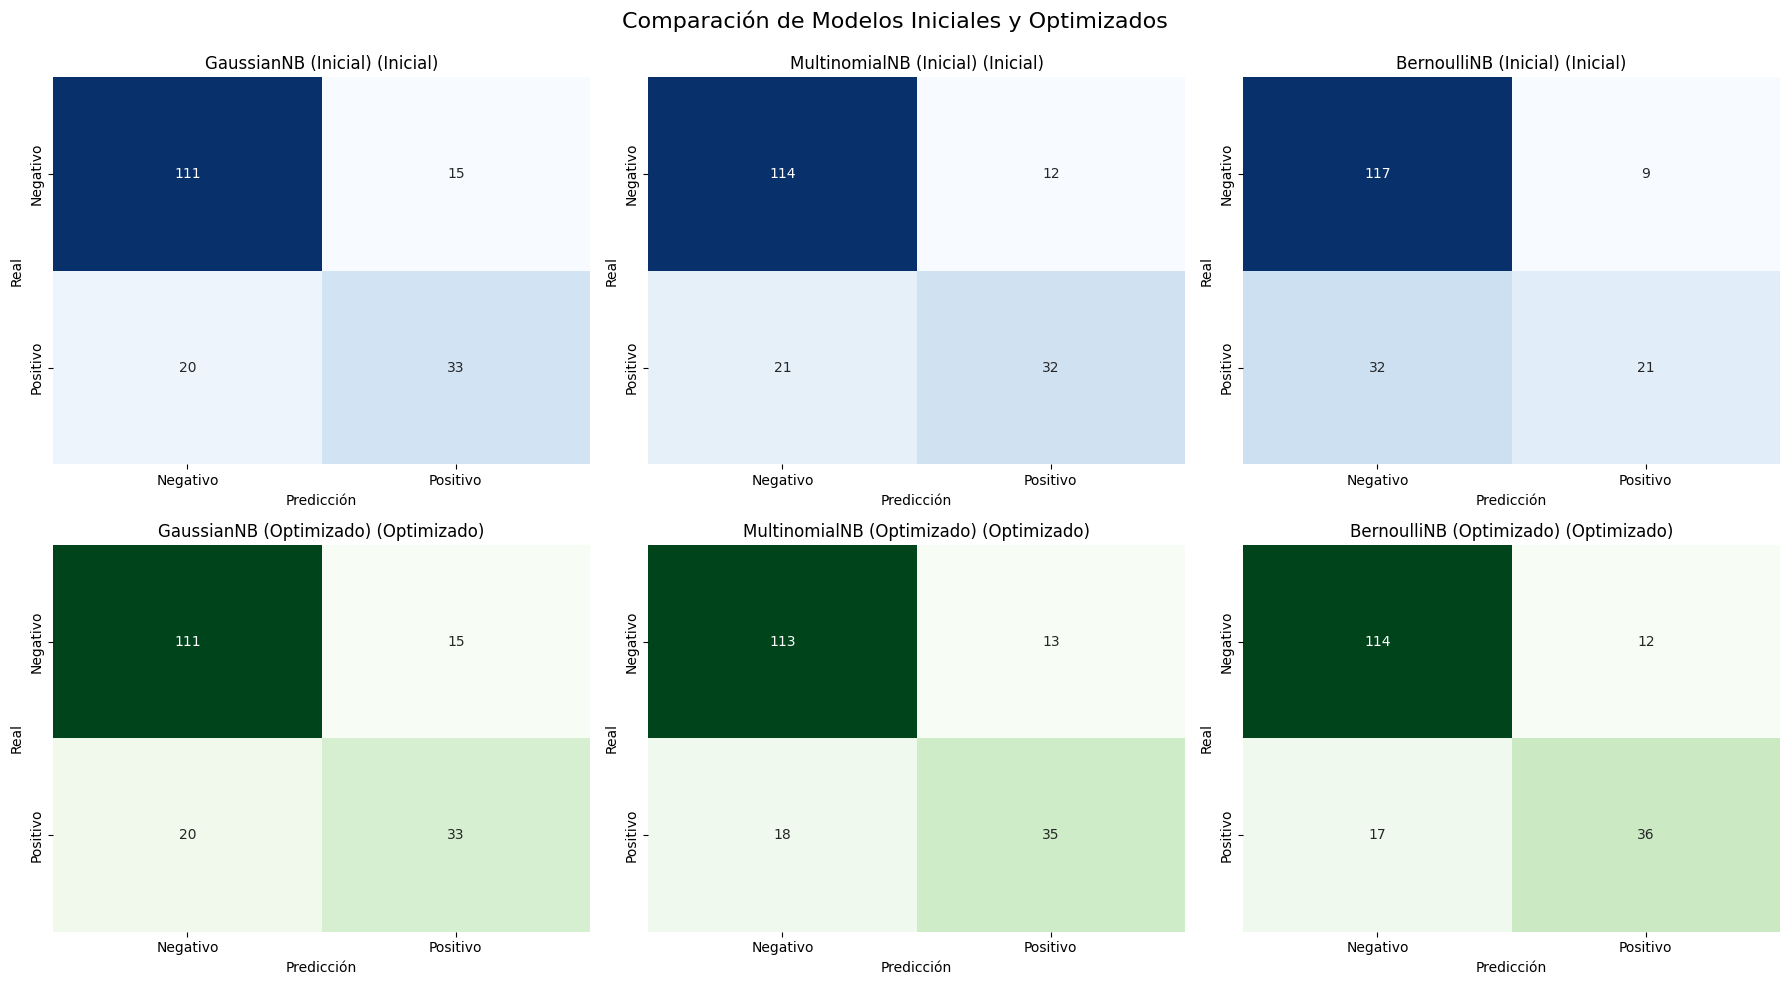

In [586]:
plot_confusion_heatmaps(
    models_initial, models_optimized,
    model_names_initial, model_names_optimized,
    X_test_initial, X_test_initial,
    y_test
)


### Buscando alternativas

Random forest

In [ ]:


# Entrenar Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_count, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test_count)

# Evaluar el modelo
print("Resultados de Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=["Negativo", "Positivo"]))


Resultados de Random Forest:
              precision    recall  f1-score   support

    Negativo       0.88      0.83      0.85       126
    Positivo       0.64      0.74      0.68        53

    accuracy                           0.80       179
   macro avg       0.76      0.78      0.77       179
weighted avg       0.81      0.80      0.80       179



XGBoost

In [ ]:
# Crear y entrenar el modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_count, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test_count)

# Evaluar el modelo
print("Resultados de XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=["Negativo", "Positivo"]))

Resultados de XGBoost:
              precision    recall  f1-score   support

    Negativo       0.87      0.87      0.87       126
    Positivo       0.69      0.70      0.69        53

    accuracy                           0.82       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.82      0.82      0.82       179



__Hiperparámetros clave para ajustar en XGBoost__   
- learning_rate: Define la tasa de aprendizaje del modelo (valores típicos: 0.01, 0.1, 0.2).
- max_depth: Controla la profundidad máxima de los árboles (valores típicos: 3, 5, 7).
- n_estimators: Especifica el número de árboles en el modelo (valores típicos: 50, 100, 200).
- subsample: Proporción de datos usados para cada árbol (valores típicos: 0.6, 0.8, 1.0).
- colsample_bytree: Proporción de características utilizadas para cada árbol (valores típicos: 0.6, 0.8, 1.0).

In [ ]:
import warnings
warnings.filterwarnings("ignore")


# Definir el modelo base
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Definir los parámetros a buscar
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,  # 3-fold cross-validation
    verbose=0,
    n_jobs=-1
)

# Ajustar los datos de entrenamiento
grid_search.fit(X_train_count, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Evaluar el modelo optimizado
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_count)

# Resultados del modelo optimizado

print("Resultados del modelo XGBoost optimizado:")
print(classification_report(y_test, y_pred_best_xgb, target_names=["Negativo", "Positivo"]))


/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:01:08] WARNING: /workspace/sr

Mejores hiperparámetros: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Resultados del modelo XGBoost optimizado:
              precision    recall  f1-score   support

    Negativo       0.84      0.86      0.85       126
    Positivo       0.64      0.60      0.62        53

    accuracy                           0.78       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.78      0.78      0.78       179



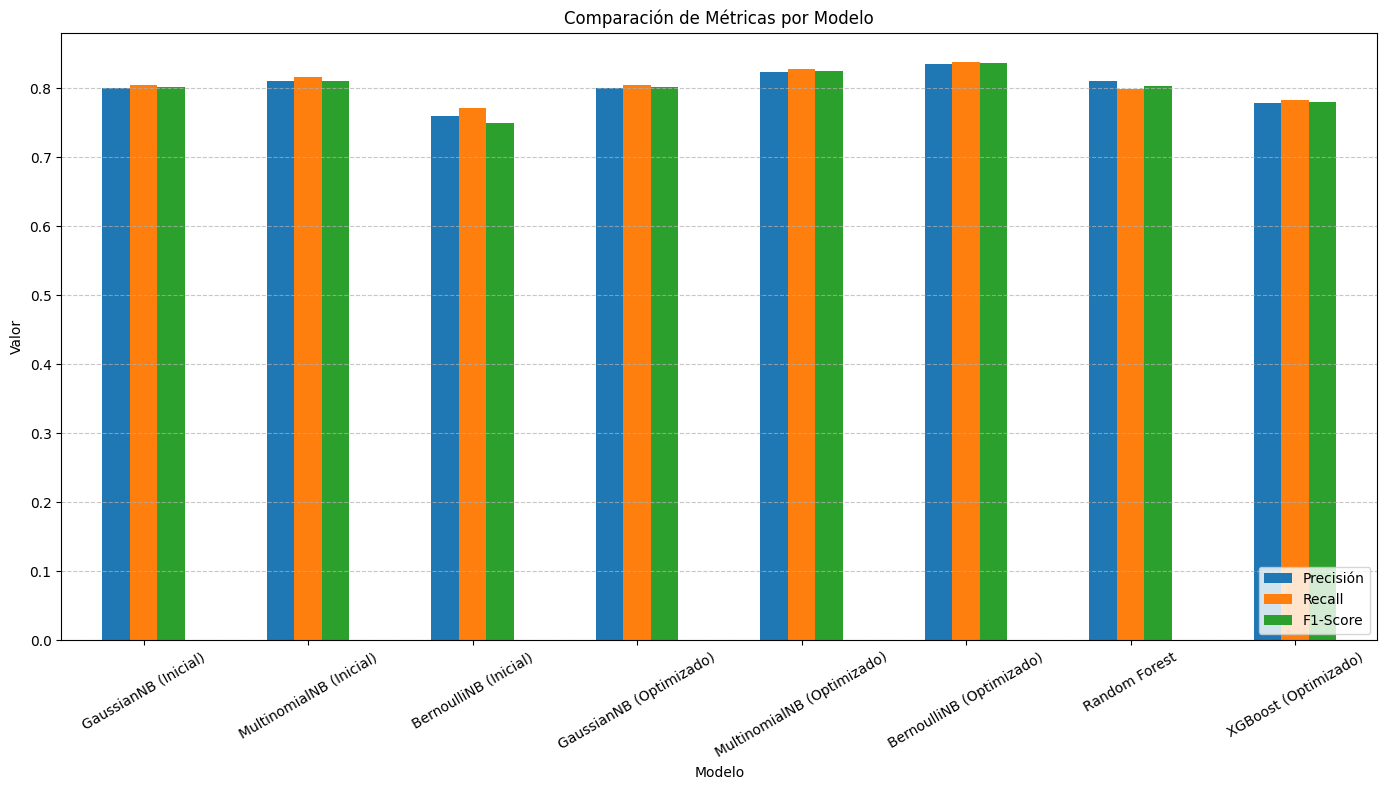

In [587]:
plot_combined_metrics(
    models_initial,  # Modelos sin optimizar
    models_optimized,  # Modelos optimizados
    [rf_model, best_xgb_model],  # Modelos alternativos: Random Forest y XGBoost
    model_names_initial,  # Nombres de los modelos sin optimizar
    model_names_optimized,  # Nombres de los modelos optimizados
    ["Random Forest", "XGBoost (Optimizado)"],  # Nombres de los alternativos
    X_test_initial,  # Datos de prueba para los modelos sin optimizar
    X_test_initial,  # Datos de prueba para los modelos optimizados
    [X_test_count, X_test_count],  # Datos de prueba para los alternativos
    y_test  # Etiquetas reales
)





#### Guardando los modelos

In [589]:
import os
import joblib

# Crear carpetas para organizar los modelos
os.makedirs("modelos_iniciales", exist_ok=True)
os.makedirs("modelos_optimizados", exist_ok=True)
os.makedirs("modelos_alternativos", exist_ok=True)

# Guardar modelos iniciales
for model, name in zip(models_initial, model_names_initial):
    filename = os.path.join("modelos_iniciales", f"{name.replace(' ', '_')}_inicial.pkl")
    joblib.dump(model, filename)

# Guardar modelos optimizados
for model, name in zip(models_optimized, model_names_optimized):
    filename = os.path.join("modelos_optimizados", f"{name.replace(' ', '_')}_optimizado.pkl")
    joblib.dump(model, filename)

# Guardar modelos alternativos
for model, name in zip([rf_model, best_xgb_model], ["Random_Forest", "XGBoost_Optimizado"]):
    filename = os.path.join("modelos_alternativos", f"{name}.pkl")
    joblib.dump(model, filename)

print("Todos los modelos han sido guardados correctamente.")


Todos los modelos han sido guardados correctamente.
